In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
df = pd.read_csv('Downloads/insurance.csv')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [43]:
df['sex'][df['sex']=='male'] = 1
df.head()

<ipython-input-43-d841f189eb37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'][df['sex']=='male'] = 1


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


In [44]:
df['sex'][df['sex']=='female'] = 0
df.head()

<ipython-input-44-28423902fec6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'][df['sex']=='female'] = 0


,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


In [45]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [46]:
df['smoker'][df['smoker']=='yes'] = 1
df['smoker'][df['smoker'] == 'no'] = 0

<ipython-input-46-92e1130a227e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoker'][df['smoker']=='yes'] = 1
<ipython-input-46-92e1130a227e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoker'][df['smoker'] == 'no'] = 0


In [47]:
df.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86
5,31,0,25.7,0,0,southeast,3756.62
6,46,0,33.4,1,0,southeast,8240.59
7,37,0,27.7,3,0,northwest,7281.51
8,37,1,29.8,2,0,northeast,6406.41
9,60,0,25.8,0,0,northwest,28923.14


In [48]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [49]:
df2 = pd.get_dummies(df['region'])
df2.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [50]:
df = pd.concat([df,df2],axis=1)
df

,age,sex,bmi,children,smoker,region,expenses,northeast,northwest,southeast,southwest
0,19,0,27.9,0,1,southwest,16884.92,0,0,0,1
1,18,1,33.8,1,0,southeast,1725.55,0,0,1,0
2,28,1,33.0,3,0,southeast,4449.46,0,0,1,0
3,33,1,22.7,0,0,northwest,21984.47,0,1,0,0
4,32,1,28.9,0,0,northwest,3866.86,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,northwest,10600.55,0,1,0,0
1334,18,0,31.9,0,0,northeast,2205.98,1,0,0,0
1335,18,0,36.9,0,0,southeast,1629.83,0,0,1,0
1336,21,0,25.8,0,0,southwest,2007.95,0,0,0,1


In [51]:
df.dropna()

,age,sex,bmi,children,smoker,region,expenses,northeast,northwest,southeast,southwest
0,19,0,27.9,0,1,southwest,16884.92,0,0,0,1
1,18,1,33.8,1,0,southeast,1725.55,0,0,1,0
2,28,1,33.0,3,0,southeast,4449.46,0,0,1,0
3,33,1,22.7,0,0,northwest,21984.47,0,1,0,0
4,32,1,28.9,0,0,northwest,3866.86,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,northwest,10600.55,0,1,0,0
1334,18,0,31.9,0,0,northeast,2205.98,1,0,0,0
1335,18,0,36.9,0,0,southeast,1629.83,0,0,1,0
1336,21,0,25.8,0,0,southwest,2007.95,0,0,0,1


In [52]:
y = df.expenses
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [53]:
df.drop(['region','expenses'], axis=1, inplace= True)

In [54]:
df.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,0,27.9,0,1,0,0,0,1
1,18,1,33.8,1,0,0,0,1,0
2,28,1,33.0,3,0,0,0,1,0
3,33,1,22.7,0,0,0,1,0,0
4,32,1,28.9,0,0,0,1,0,0


In [62]:
df['sex']=df['sex'].astype(int)
df['smoker']=df['smoker'].astype(int)
df.dtypes

age            int64
sex            int32
bmi          float64
children       int64
smoker         int32
northeast      uint8
northwest      uint8
southeast      uint8
southwest      uint8
dtype: object

In [63]:
df.describe()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.665471,1.094918,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098382,1.205493,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.100000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000


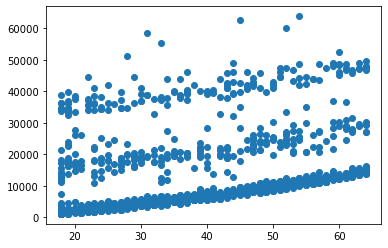

In [64]:
plt.scatter(df['age'],y)

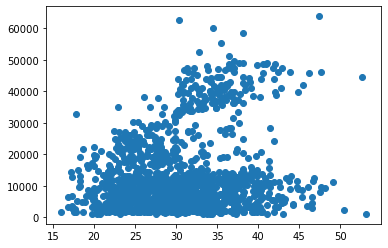

In [65]:
plt.scatter(df['bmi'],y)

In [70]:
df.drop(['southwest'],axis=1,inplace=True)

In [71]:
df.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast
0,19,0,27.9,0,1,0,0,0
1,18,1,33.8,1,0,0,0,1
2,28,1,33.0,3,0,0,0,1
3,33,1,22.7,0,0,0,1,0
4,32,1,28.9,0,0,0,1,0


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train , X_test, y_train , y_test = train_test_split(df, y, test_size=0.2 )
print(X_train.shape,y_train.shape)

(1070, 8) (1070,)


In [74]:
print(X_test.shape,y_test.shape)

(268, 8) (268,)


In [75]:
model = LinearRegression()

In [76]:
model.fit(X_train,y_train)

LinearRegression()

In [86]:
y_pred = pd.DataFrame(model.predict(X_test))

In [88]:
y_pred

,0
0,12172.225428
1,10436.911444
2,30247.775492
3,24445.042283
4,6699.999963
...,...
263,12962.509490
264,32139.127179
265,26512.132625
266,34311.386619


In [91]:
model.score(X_test,y_test)

0.7643021532032412